# Food Access in DC Midterm
### Maps produced by Emily Biro, Christopher Do, Brittney Lu, Rachel Seiberg

### Main research question: 
What is the overall food landscape for the City of Washington D.C.?

### Sub questions: 
Does healthy food access vary across wards? If so, how might this impact different demographics? Are there areas in the City of Washington D.C. that have greater access to healthy food? Are there areas in the City of Washington D.C. that have a higher concentration of unhealthy food options? Is there a visual relationship between DC demographics, food environments, and health outcomes? What are important indicators of healthy and unhealthy food access?

### Week 7 assignment
For this week's assignment, we cleaned our notebook by making a major change to our data, switching analyses from census tract level to Ward. We also removed maps related to percentage of households with and without access to vehicles in 2021. We have 2 static maps related to race/ethnicity and income, along with 2 interactive choropleth maps on the same data, adding on store data. The interactive maps illustrate all grocery and healthy corner stores in the city based on percent black by ward and median household income by ward. This included running a for loop to cluster store markers.

After creating these maps, we were curious about what food access actually means in different wards. In order to answer this question, we produced charts that provide more detail on the types of stores available in different wards to paint a better picture of the quality of food access. 

The following updates to our midterm assignment are divided into 3 notebooks so that we did not overwhelm our notebook memory. 

Part 1 sets the stage of food access in DC by looking at food access based on ward demographic data. Part 2 seeks to make the connection between race/ethnicity with income- we wanted to see if there was a connection between food access based on race with median household income. Parts 1 and 2 brought up new questions around what food access actually looks like in different wards, especially wards with high concentrations of black folks and low median housheold income. As such, Part 3 explores quality of food access by ward.

### Data sources: 
Open Data DC and Social Explorer

* ACS Demographic Characteristics DC Ward 2022 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::acs-demographic-characteristics-dc-ward/explore?location=38.893659%2C-77.014562%2C12.00)): DC income data by ward

* ACS Economic Characteristics DC Ward 2022 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::acs-economic-characteristics-dc-ward/explore?location=38.890649%2C-77.031102%2C12.17)): DC income data by ward

* Grocery Store Locations in DC, 2022 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::grocery-store-locations/explore)): Grocery store locations in DC

* Healthy Corner Store Locations in DC, 2022 ([Open Data DC](https://opendata.dc.gov/datasets/healthy-corner-stores/explore)): Healthy corner store locations in DC

* Liquor Licensee Locations in DC, 2023 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::liquor-licenses/explore?location=38.902497%2C-77.008884%2C12.43)): indicator for a "bad / unhealthy" food resource

# Part 1: Demographic distribution

Before we get started, we need to import relevant data libraries (pandas, geopandas, folium, matplotlib, and contextily)

In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx

# Cleaning up the data
## Open Data DC - Demographic data (race and ethnicity) by ward
First, we need to explore our data (from Open Data DC) and trim it to make sure that we can merge data where needed

In order to explore data, we'll input data from Open Data DC

In [2]:
demog = gpd.read_file('demog.geojson') # import the data

Let's check out the column names of the data

In [3]:
demog.head(1)

,OBJECTID,STATEFP,SLDUST,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,NAME,...,DP05_0084E,DP05_0085E,DP05_0086E,DP05_0087E,DP05_0088E,DP05_0089E,GIS_ID,SHAPEAREA,SHAPELEN,geometry
0,1,11,002,11002,Ward 2,16573627,5928027,+38.8926196,-077.0427418,"Ward 2, District of Columbia",...,749,1609,43859,64742,31492,33250,ACS_Demographic_DC_Ward_2,0,0,"POLYGON ((-77.08171 38.91744, -77.08173 38.917..."


Woah these titles are weird... Let's view all column names to see what we're working with

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
demog.head(2)

,OBJECTID,STATEFP,SLDUST,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,NAME,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,DP05_0008E,DP05_0009E,DP05_0010E,DP05_0011E,DP05_0012E,DP05_0013E,DP05_0014E,DP05_0015E,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0019E,DP05_0020E,DP05_0021E,DP05_0022E,DP05_0023E,DP05_0024E,DP05_0025E,DP05_0026E,DP05_0027E,DP05_0028E,DP05_0029E,DP05_0030E,DP05_0031E,DP05_0032E,DP05_0033E,DP05_0034E,DP05_0035E,DP05_0036E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0040E,DP05_0041E,DP05_0042E,DP05_0043E,DP05_0044E,DP05_0045E,DP05_0046E,DP05_0047E,DP05_0048E,DP05_0049E,DP05_0050E,DP05_0051E,DP05_0052E,DP05_0053E,DP05_0054E,DP05_0055E,DP05_0056E,DP05_0057E,DP05_0058E,DP05_0059E,DP05_0060E,DP05_0061E,DP05_0062E,DP05_0063E,DP05_0064E,DP05_0065E,DP05_0066E,DP05_0067E,DP05_0068E,DP05_0069E,DP05_0070E,DP05_0071E,DP05_0072E,DP05_0073E,DP05_0074E,DP05_0075E,DP05_0076E,DP05_0077E,DP05_0078E,DP05_0079E,DP05_0080E,DP05_0081E,DP05_0082E,DP05_0083E,DP05_0084E,DP05_0085E,DP05_0086E,DP05_0087E,DP05_0088E,DP05_0089E,GIS_ID,SHAPEAREA,SHAPELEN,geometry
0,1,11,002,11002,Ward 2,16573627,5928027,+38.8926196,-077.0427418,"Ward 2, District of Columbia",77923,37356,40567,92.1,2307,719,650,6909,11779,22730,10141,6802,3554,3648,5458,2531,695,32.0,4049,74203,73874,63967,10417,8684,73874,35762,38112,93.8,8684,4080,4604,88.6,77923,73822,4101,73822,57155,6434,646,19,0,0,0,7607,1926,2684,356,439,1055,392,755,96,7,18,0,71,1884,4101,693,156,1041,6,77923,60686,7530,1217,8970,235,3868,77923,10014,2065,883,479,6587,67909,51495,6174,117,7486,96,183,2358,749,1609,43859,64742,31492,33250,ACS_Demographic_DC_Ward_2,0,0,"POLYGON ((-77.08171 38.91744, -77.08173 38.917..."
1,2,11,008,11008,Ward 8,22429470,8473345,+38.8390139,-077.0071260,"Ward 8, District of Columbia",85564,38976,46588,83.7,8314,6711,7167,5175,6423,13961,10625,8714,4581,4913,5874,2050,1056,30.7,25442,61808,60122,56845,12010,8980,60122,26473,33649,78.7,8980,3381,5599,60.4,85564,82930,2634,82930,5938,74351,108,65,0,0,0,393,33,61,101,0,107,4,87,8,2,3,0,3,2132,2634,1121,196,119,461,85564,7921,76368,948,697,59,2590,85564,3545,1110,414,90,1931,82019,5051,73562,89,393,5,724,2195,20,2175,36167,58850,25768,33082,ACS_Demographic_DC_Ward_8,0,0,"POLYGON ((-77.04801 38.84127, -77.04802 38.841..."


Lots of confusing titles! Let's switch rename the relevant columns that we'll be keeping later on

In [5]:
# rename "NAMELSAD" to "WARD" to be consistent with gsl data for merging
demog.rename(columns={'NAMELSAD':'WARD'}, inplace=True),
demog.rename(columns={'INTPTLAT':'LATITUDE'}, inplace=True),
demog.rename(columns={'INTPTLON':'LONGITUDE'}, inplace=True),
demog.rename(columns={'DP05_0033E':'Total Population'}, inplace=True),
demog.rename(columns={'DP05_0035E':'Total Population, Two Races or more'}, inplace=True),
demog.rename(columns={'DP05_0077E':'White, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0078E':'Black, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0079E':'American Indian and Alaska Native, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0080E':'Asian, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0081E':'Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0082E':'Some Other Race, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0083E':'Two or More Races, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0071E':'Hispanic or Latino of Any Race'}, inplace=True),
demog.tail(1)

,OBJECTID,STATEFP,SLDUST,GEOID,WARD,ALAND,AWATER,LATITUDE,LONGITUDE,NAME,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,DP05_0008E,DP05_0009E,DP05_0010E,DP05_0011E,DP05_0012E,DP05_0013E,DP05_0014E,DP05_0015E,DP05_0016E,DP05_0017E,DP05_0018E,DP05_0019E,DP05_0020E,DP05_0021E,DP05_0022E,DP05_0023E,DP05_0024E,DP05_0025E,DP05_0026E,DP05_0027E,DP05_0028E,DP05_0029E,DP05_0030E,DP05_0031E,DP05_0032E,Total Population,DP05_0034E,"Total Population, Two Races or more",DP05_0036E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0040E,DP05_0041E,DP05_0042E,DP05_0043E,DP05_0044E,DP05_0045E,DP05_0046E,DP05_0047E,DP05_0048E,DP05_0049E,DP05_0050E,DP05_0051E,DP05_0052E,DP05_0053E,DP05_0054E,DP05_0055E,DP05_0056E,DP05_0057E,DP05_0058E,DP05_0059E,DP05_0060E,DP05_0061E,DP05_0062E,DP05_0063E,DP05_0064E,DP05_0065E,DP05_0066E,DP05_0067E,DP05_0068E,DP05_0069E,DP05_0070E,Hispanic or Latino of Any Race,DP05_0072E,DP05_0073E,DP05_0074E,DP05_0075E,DP05_0076E,"White, Non Hispanic or Latino","Black, Non Hispanic or Latino","American Indian and Alaska Native, Non Hispanic or Latino","Asian, Non Hispanic or Latino","Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino","Some Other Race, Non Hispanic or Latino","Two or More Races, Non Hispanic or Latino",DP05_0084E,DP05_0085E,DP05_0086E,DP05_0087E,DP05_0088E,DP05_0089E,GIS_ID,SHAPEAREA,SHAPELEN,geometry
7,8,11,003,11003,Ward 3,26946477,1316331,+38.9383001,-077.0781397,"Ward 3, District of Columbia",84651,38052,46599,81.7,4418,4428,3308,4758,6088,15864,12074,10328,4009,4230,7704,5294,2148,37.7,13814,71845,70837,66328,17932,15146,70837,31232,39605,78.9,15146,6354,8792,72.3,84651,80634,4017,80634,65437,7141,209,77,0,8,0,6481,2360,1118,879,226,190,634,1074,56,12,35,0,9,1310,4017,1044,62,1714,71,84651,69146,8632,556,8407,62,2307,84651,8155,1363,502,762,5528,76496,59616,6868,150,6377,56,449,2980,92,2888,40711,63600,28276,35324,ACS_Demographic_DC_Ward_3,0,0,"POLYGON ((-77.11975 38.93436, -77.11976 38.934..."


Looks good! Now let's make sure our demographic data is in the right projection

In [6]:
demog.crs #check projection

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We're in the wrong projection so let's change that!

In [7]:
demog_wm = demog.to_crs(epsg=3857) #change projection

We don't need most of the columns in the data set. Let's define the columns we need and trim the data to keep only the necessary columns. We'll also perform a head function to make sure it worked

In [8]:
demog_columns_keep=['WARD', 'LATITUDE','LONGITUDE','Total Population', 'Total Population, Two Races or more','White, Non Hispanic or Latino','Black, Non Hispanic or Latino','American Indian and Alaska Native, Non Hispanic or Latino','Asian, Non Hispanic or Latino','Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino','Some Other Race, Non Hispanic or Latino','Two or More Races, Non Hispanic or Latino','Hispanic or Latino of Any Race','geometry']

In [9]:
demog_trimmed = demog_wm[demog_columns_keep].copy() #create new data frame with trimmed data
demog_trimmed = demog_trimmed.dropna()
demog_trimmed.head(3)

,WARD,LATITUDE,LONGITUDE,Total Population,"Total Population, Two Races or more","White, Non Hispanic or Latino","Black, Non Hispanic or Latino","American Indian and Alaska Native, Non Hispanic or Latino","Asian, Non Hispanic or Latino","Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino","Some Other Race, Non Hispanic or Latino","Two or More Races, Non Hispanic or Latino",Hispanic or Latino of Any Race,geometry
0,Ward 2,+38.8926196,-077.0427418,77923,4101,51495,6174,117,7486,96,183,2358,10014,"POLYGON ((-8580696.853 4709851.992, -8580698.4..."
1,Ward 8,+38.8390139,-077.0071260,85564,2634,5051,73562,89,393,5,724,2195,3545,"POLYGON ((-8576945.384 4698960.838, -8576946.6..."
2,Ward 6,+38.8866683,-077.0028435,101882,4228,57364,28269,157,4807,8,272,3060,7945,"POLYGON ((-8575142.899 4704858.627, -8575203.4..."


We can see all of the columns we need! Let's check out the trimmed data frame just to make sure

In [10]:
demog_trimmed.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   WARD                                                                8 non-null      object  
 1   LATITUDE                                                            8 non-null      object  
 2   LONGITUDE                                                           8 non-null      object  
 3   Total Population                                                    8 non-null      int64   
 4   Total Population, Two Races or more                                 8 non-null      int64   
 5   White, Non Hispanic or Latino                                       8 non-null      int64   
 6   Black, Non Hispanic or Latino                                       8 non-null      int64   
 7   Amer

Now there's only the 14 columns we need. Great!

We want to add two new columns to assess the percent of the DC population that is black and white.

In [11]:
# creating percentages for black and white populations in relation to total population
demog_trimmed['PCT_Black'] = demog_trimmed['Black, Non Hispanic or Latino']/demog_trimmed['Total Population']*100
demog_trimmed['PCT_White'] = demog_trimmed['White, Non Hispanic or Latino']/demog_trimmed['Total Population']*100

Let's see if the new columns show up:

In [12]:
demog_trimmed.head(1)

,WARD,LATITUDE,LONGITUDE,Total Population,"Total Population, Two Races or more","White, Non Hispanic or Latino","Black, Non Hispanic or Latino","American Indian and Alaska Native, Non Hispanic or Latino","Asian, Non Hispanic or Latino","Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino","Some Other Race, Non Hispanic or Latino","Two or More Races, Non Hispanic or Latino",Hispanic or Latino of Any Race,geometry,PCT_Black,PCT_White
0,Ward 2,+38.8926196,-077.0427418,77923,4101,51495,6174,117,7486,96,183,2358,10014,"POLYGON ((-8580696.853 4709851.992, -8580698.4...",7.923206,66.084468


We can see the new columns added at the end.

Now, we're able to map the percent black population by ward. We'll add a legend, lock it in place to the right of the map, chose a scheme, and make the data opaque over the basemap. We'll also create a title and remove the axis 

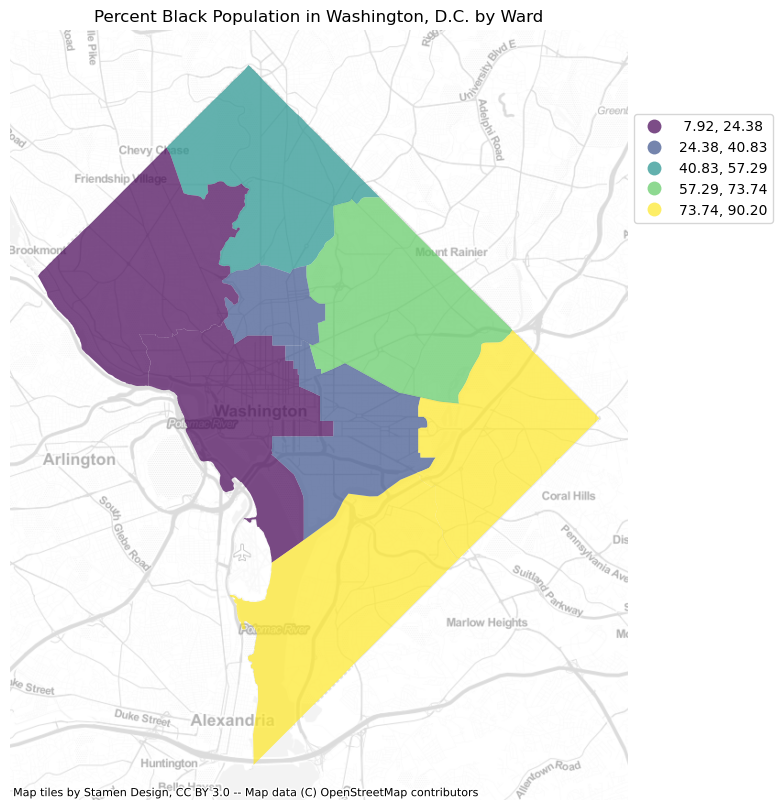

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
demog_trimmed.plot(figsize=(12,10), # plot the data
                 column='PCT_Black',
                 legend=True, 
                 ax=ax,
                 legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                 scheme='equal_interval', alpha=0.7)
ax.set_title('Percent Black Population in Washington, D.C. by Ward') # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                ) 
ax.set_axis_off() # remove axis

This map shows that the SE quadrant of D.C. has a noticably high concentration of black people. There is a clear divide between east and west, in which there are significantly more black individuals living in the eastern region of the city.

## Open Data DC - Data on Food (Grocery Stores and Healthy Corner Stores)
Next, we need to explore the food data (from Open Data DC) and trim it to make sure that we can merge data where needed

In order to explore data, we'll input my data from Open Data DC

In [14]:
gsl = pd.read_csv('Grocery_Store_Locations.csv') # import the data

Let's check out the basic shape of the data

In [15]:
gsl.shape

(82, 36)

There are 82 rows and 36 columns

To get a better sense of what the data looks like, we'll execute the "head" function to view the first 5 rows of the data

In [16]:
gsl.head()

,X,Y,STORENAME,ADDRESS,ZIPCODE,PHONE,WARD,SSL,NOTES,PRESENT90,PRESENT95,PRESENT00,PRESENT05,PRESENT08,PRESENT09,PRESENT10,PRESENT11,PRESENT12,PRESENT13,PRESENT14,PRESENT15,PRESENT16,PRESENT17,PRESENT18,GIS_ID,OBJECTID,XCOORD,YCOORD,MAR_ID,SE_ANNO_CAD_DATA,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,PRESENT22
0,-77.026981,38.984455,Target,7828 GEORGIA AVENUE NW,20012,2028923822,Ward 4,2960 0017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GroceryStorePt_1,641,397662.57,146280.07,300512,NaN,{CE302122-4E8D-4DC7-845B-06563B993F66},JLAY,2022/09/28 18:04:54+00,JLAY,2022/09/28 18:04:54+00,Yes
1,-77.026066,38.983464,International Progresso Market,7719 GEORGIA AVENUE NW,20012,2025455015,Ward 4,2961 0810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GroceryStorePt_2,642,397741.80,146169.97,285417,NaN,{2C18863D-40DE-4F66-AA59-46F1C65D67F2},JLAY,2022/09/28 18:04:54+00,JLAY,2022/09/28 18:04:54+00,Yes
2,-77.027798,38.967771,Jocelyn’s Market,6404 GEORGIA AVENUE NW,20012,2027227574,Ward 4,2945 0839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GroceryStorePt_3,643,397591.16,144428.00,285334,NaN,{A0B448C3-B3FB-49FE-B8BF-1FEBA3CEA642},JLAY,2022/09/28 18:04:54+00,JLAY,2022/09/28 18:04:54+00,Yes
3,-77.076459,38.965553,Magruder's,5626 CONNECTICUT AVENUE NW,20015,2024644946,Ward 3,1860 0013,,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,GroceryStorePt_4,644,393373.92,144184.19,263860,NaN,{9ABE1C46-BB48-4110-B5BA-C6363CA3BD7A},JLAY,2022/09/28 18:04:54+00,JLAY,2022/09/28 18:04:54+00,Yes
4,-77.074910,38.964601,Safeway,5545 CONNECTICUT AVENUE NW,20015,2022446097,Ward 3,1867 0092,,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,GroceryStorePt_5,645,393508.13,144078.34,263999,NaN,{902F540E-FE16-43A5-8010-CD84E94B28B7},JLAY,2022/09/28 18:04:54+00,JLAY,2022/09/28 18:04:54+00,Yes


I can see the first 5 rows, but we can't see all of the columns

Let's execute a command that allows me to see all of the columns:

In [17]:
gsl.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 82 non-null     float64
 1   Y                 82 non-null     float64
 2   STORENAME         82 non-null     object 
 3   ADDRESS           82 non-null     object 
 4   ZIPCODE           82 non-null     int64  
 5   PHONE             82 non-null     int64  
 6   WARD              82 non-null     object 
 7   SSL               82 non-null     object 
 8   NOTES             53 non-null     object 
 9   PRESENT90         55 non-null     object 
 10  PRESENT95         55 non-null     object 
 11  PRESENT00         55 non-null     object 
 12  PRESENT05         55 non-null     object 
 13  PRESENT08         55 non-null     object 
 14  PRESENT09         55 non-null     object 
 15  PRESENT10         55 non-null     object 
 16  PRESENT11         55 non-null     object 
 17 

Okay so now we can see the 36 column titles and to what extent they're filled out

We want to create a new column called "store type" because I'm planning to merge this data set with the Open Data DC data set on healthy corner stores. We're hoping to distinguish between these store types in our map later, so we need to add this new column, with all entries being "grocery store" since these are all from the grocery store location data set.

In [18]:
gsl['STORE TYPE']= 'Grocery store' # create a new column "store type"

We created a new column, "store type"

Next, we need to trim the grocery store location data to keep only relevant columns that we may use later on when mapping. We also must make a new data frame (gsl_trimmed) as a copy of the original data frame, gsl

In [19]:
# subset the data
desired_columns= ['X','Y','STORENAME','WARD', 'STORE TYPE']
gsl_trimmed = gsl[desired_columns].copy()
gsl_trimmed = gsl_trimmed.dropna()
gsl_trimmed.sample(1)

,X,Y,STORENAME,WARD,STORE TYPE
30,-76.950881,38.920851,Costco Wholesale,Ward 5,Grocery store


Yay it worked! Now each of our trimmed data rows only have the X,Y coordinates, the name of the store, the ward number, and the store type

We're going to repeat this same process with healthy corner stores, because we hope to merge these two data sets to build a data set that reflects access to healthy foods

Import the healthy corner stores data from Open Data DC:

In [20]:
healthy= pd.read_csv('Healthy_Corner_Stores.csv') # import healthy corner store data

Assess the shape of the data

In [21]:
healthy.shape # tells me how many rows and columns in the data set

(71, 17)

There are 71 rows and 17 columns

To get a better sense of what the data looks like, we'll execute the "head" function to view the first 5 rows of the data

In [22]:
healthy.head()

,X,Y,OBJECTID,STORE,ADDRESS,XCOORD,YCOORD,MATCHTYPE,MAR_ID,LATITUDE,LONGITUDE,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.019079,38.975046,1,BP Blaire Gas Station,7000 Blair Rd NW,398346.95,145235.41,Exact,249127.0,38.975039,-77.019077,HealthyCornerStorePt_1,{F6CD05AE-1648-404D-B7A3-603BE5E3361B},NaN,NaN,NaN,NaN
1,-77.028431,38.961525,2,Missouri Avenue Market,5900 Georgia Ave NW,397536.12,143734.68,Exact,253189.0,38.961518,-77.028429,HealthyCornerStorePt_2,{87C1AAA2-139C-4A8D-AA34-DF7A3AA1312C},NaN,NaN,NaN,NaN
2,-77.010355,38.956438,3,Capital View Convenience Store,12 Kennedy St NW,399102.65,143169.61,Exact,283923.0,38.956431,-77.010353,HealthyCornerStorePt_3,{77D178A5-1D12-492B-A96C-5D0FFC242C97},NaN,NaN,NaN,NaN
3,-77.027749,38.955825,4,S&G Liquor and Grocery,5421 Georgia Ave NW,397595.00,143101.81,Exact,254615.0,38.955817,-77.027747,HealthyCornerStorePt_4,{D8EB793F-418B-43A8-843B-DA0CFACA0832},NaN,NaN,NaN,NaN
4,-77.020196,38.955826,5,Starlight Food,5424 5th St NW,0.00,0.00,Manual,NaN,NaN,NaN,HealthyCornerStorePt_5,{1DA97531-D58F-4F82-9D9B-4071D1B7B361},NaN,NaN,NaN,NaN


We can see all of the columns this time

But we'll still execute a command to see all columns in the data frame to get a sense of the data type and to what extent the columns are filled out

In [23]:
healthy.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          71 non-null     float64
 1   Y          71 non-null     float64
 2   OBJECTID   71 non-null     int64  
 3   STORE      71 non-null     object 
 4   ADDRESS    71 non-null     object 
 5   XCOORD     71 non-null     float64
 6   YCOORD     71 non-null     float64
 7   MATCHTYPE  71 non-null     object 
 8   MAR_ID     68 non-null     float64
 9   LATITUDE   68 non-null     float64
 10  LONGITUDE  68 non-null     float64
 11  GIS_ID     71 non-null     object 
 12  GLOBALID   71 non-null     object 
 13  CREATOR    0 non-null      float64
 14  CREATED    0 non-null      float64
 15  EDITOR     0 non-null      float64
 16  EDITED     0 non-null      float64
dtypes: float64(11), int64(1), object(5)
memory usage: 9.6+ KB


Next, we want to change the column title "store" to "storename" to be consistent with the grocery store location data- we'll be merging these variables next

Let's also run a head to make sure it worked

In [24]:
# rename "store" to "storename" to be consistent with gsl data for merging
healthy.rename(columns={'STORE':'STORENAME'}, inplace=True)
healthy.tail(1)

,X,Y,OBJECTID,STORENAME,ADDRESS,XCOORD,YCOORD,MATCHTYPE,MAR_ID,LATITUDE,LONGITUDE,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
70,-77.007553,38.825895,71,Elmira Grocery,4401 South Capitol Street SW,399344.35,128678.31,Exact,299727.0,38.825888,-77.007551,HealthyCornerStorePt_71,{B521A46A-D853-4EC3-83DF-C207EBB2CD5E},NaN,NaN,NaN,NaN


It worked!

Like we did previously with gsl data, we're adding a new column "store type" and listing all of the rows in this data set as healthy corner stores. This will help me distinguish from grocery store locations later on when we merge the data and map it

In [25]:
healthy['STORE TYPE']= 'Healthy corner store' # add a new column with the input "healthy corner store"

This let me create a new column, store type, with all entries being healthy corner store

Like with grocery store locations, we only need a few relevant columns, so we'll trim the data accordingly

In [26]:
# subset the data
desired_columns_healthy= ['X','Y','STORENAME','STORE TYPE'] # only keep the necessary columns
healthy[desired_columns_healthy].sample(3)
healthy_trimmed = healthy[desired_columns_healthy].copy()
healthy_trimmed = healthy_trimmed.dropna()
healthy_trimmed.sample(3)

,X,Y,STORENAME,STORE TYPE
34,-76.990357,38.903047,Bodega Market,Healthy corner store
43,-76.954283,38.890202,Greenway Market,Healthy corner store
29,-76.935781,38.909795,Z Mart,Healthy corner store


When we ran a sample, we can see that the trimmed data only has the columns we wanted: X,Y, storename, and store type

Next, we will merge the two data sets we just trimmed (grocery store locations and healthy corner stores) because we're hoping to map both of these data sets together

In [27]:
all_stores= pd.concat([gsl_trimmed, healthy_trimmed], axis=0) # merge the data using the concatenation function
all_stores.sample(3) # make sure the concatenation worked

,X,Y,STORENAME,WARD,STORE TYPE
53,-77.049070,38.900919,Whole Foods,Ward 2,Grocery store
49,-76.933533,38.881611,Dollar Plus Food Store (Benning Rd.),NaN,Healthy corner store
52,-76.978032,38.901569,Aldi,Ward 5,Grocery store


We can see different stores with different store types, so we know it worked

We'll check out the shape and see if the number of rows and columns checks out

In [28]:
all_stores.shape

(153, 5)

Yay again! The number of rows and columns makes sense based on the concatenation

Finally, we can move on!

## Mapping store locations (grocery stores and healthy corner stores) in D.C. based on percent black population

We're going to create an interactive Choropleth map based on percent black population. We're going to also add the all_stores data (grocery stores and healthy corner stores) and create a legend to distinguish between the two

First, import  basemap from folium

Next, use a for loop to add markers to the store locations so that we can map them

In [29]:
# import basemap from folium
m = folium.Map(location=[38.9072, -77.0369], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')
# loop to add markers to the store locations 
for index, row in all_stores.iterrows():
    print(row.STORENAME, row.X, row.Y)

Target  -77.0269805790129 38.9844552988866
International Progresso Market -77.0260657546085 38.9834637018227
Jocelyn’s Market  -77.0277982734047 38.9677712350042
Magruder's -77.0764593007974 38.9655532402862
Safeway -77.0749096653148 38.9646007197834
Walmart Supercenter -77.0272851396928 38.962078321939
Walmart Supercenter -77.0021444681289 38.9579766930922
Tropimart International Foods -77.0213178876896 38.9566042517642
Rodman’s  -77.0838608276822 38.9563029882965
Avenue Market -77.0123007836538 38.9514161546653
Whole Foods -77.0792147083642 38.9491088872299
Target  -77.080552496299 38.9485365777595
Wagshal’s Market  -77.0957591117584 38.9457215516
Giant -77.0631725104573 38.9445067759354
Yes! Organic -77.0255289707541 38.9410364720762
Morazan Grocery Store -77.0330336144517 38.9394468802695
Yes! Organic -76.9903974420661 38.9368242449082
Target  -77.0580161995249 38.9358594136603
Streets Market -77.0578868641251 38.9352427693639
Yes! Organic -77.0577904942142 38.9351664266393
Giant -

This function printed the name of the store with the X,Y coordinates

Next, we'll first develop a Choropleth map that is interactive, projecting percent black populations by ward in Washington D.C. We'll use a for loop to do this. Rather than using the merged data (all_stores), we'll ensure that the markers are different colors based on store type. So, we'll use the trimmed gsl and healthy stores data sets and set different colors to their markers

In [30]:
# create choropleth map for percent black population in census tracts
folium.Choropleth(
                  geo_data=demog_trimmed, 
                  data=demog_trimmed,         
                  key_on='feature.properties.WARD', 
                  columns=['WARD', 'PCT_Black'], 
                  fill_color='PuBuGn',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                  legend_name='Percent Black').add_to(m)
for index, row in gsl_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='white',icon_color='black')).add_to(m)
for index, row in healthy_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='black')).add_to(m)
# create a legend
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:white;opacity:0.7;'></span>Grocery Stores</li>
    <li><span style='background:Black;opacity:0.7;'></span>Healthy Corner Stores</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m

This map shows the store locations, differentiated between grocery stores and healthy corner stores by color, in Washington D.C. We can see that the map highlights black populations by ward. This helps us understand the spatial distribution of different types of food access for black communities.

We can see that there are way more healthy corner stores, which are likely less accessible (since they're more expensive) and far fewer full-fledged grocery stores in areas with high concentrations of black people. This is grounds for us to probe the question further if there is a food disparity in D.C. based on race and ethnicity. We hypothesize that there is far more disparity in wards with high concentrations of black people, especially since healthy corner stores do not necessarily provide enough food access. Further discussion in part 2 is provided. 

# Add a function and a loop

Finally, we will develop a function to cluster all store types so that we can see general concentrations of stores. When zooming in, we can begin to see smaller pockets of food concentrations and general store distribution.

We then created a for loop for all wards when clustering.

In [34]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[all_stores['Y'].mean(), all_stores['X'].mean()], zoom_start=12)

m2=folium.FeatureGroup(name= "All Stores").add_to(m)

marker_cluster = MarkerCluster(
name= "Cluster Map"
).add_to(m2)

for row in all_stores.itertuples():
    location=row.Y, row.X
    popup=row.STORENAME
    marker=folium.Marker(location=location,popup=popup)
    marker_cluster.add_child(marker)

folium.Choropleth(
                  geo_data=demog_trimmed,
                  name= "PCT_Black",
                  data=demog_trimmed,         
                  key_on='feature.properties.WARD', 
                  columns=['WARD', 'PCT_Black'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Percent Black').add_to(m) 

folium.LayerControl().add_to(m)
m

This map is helpful to show the clustering of food access in DC. When looking closely into this clustering by zooming in, we can see that the food access is much less meaningful in wards with high concentrations of black people.

## Income distribution
Based on this spatial distribution of race and ethnicity in DC, we posit that we would see a similar picture based on median household income. In order to assess this, we duplicated these same steps for median household income.

## NB viewer link:
https://nbviewer.org/github/rseiberg/food_access_dc/blob/main/Group%20Assignments/Week%207/Part%201%20race.ipynb